In [1]:
print(__doc__)

# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import pandas as pd

Automatically created module for IPython interactive environment


In [2]:
cani = pd.read_csv("../Resources/Strain_Frame_Energy.csv")
cani

,Energetic,Relax,StrainType
0,2,3,3
1,4,1,3
2,4,1,1
3,3,2,3
4,2,2,3
...,...,...,...
2346,3,2,3
2347,2,3,2
2348,1,3,2
2349,2,3,2


In [3]:
X = cani[['Energetic','Relax']].to_numpy()
X

array([[2, 3],
       [4, 1],
       [4, 1],
       ...,
       [1, 3],
       [2, 3],
       [3, 2]], dtype=int64)

In [4]:
Y = cani['StrainType'].to_numpy()
Y

array([3, 3, 1, ..., 2, 2, 2], dtype=int64)

In [5]:
# import some data to play with
#iris = datasets.load_iris()
#iris.data

In [6]:
#iris.target

In [7]:
#X = iris.data[:, :2]  # we only take the first two features.
#Y = iris.target

In [8]:
X

array([[2, 3],
       [4, 1],
       [4, 1],
       ...,
       [1, 3],
       [2, 3],
       [3, 2]], dtype=int64)

In [9]:
Y

array([3, 3, 1, ..., 2, 2, 2], dtype=int64)

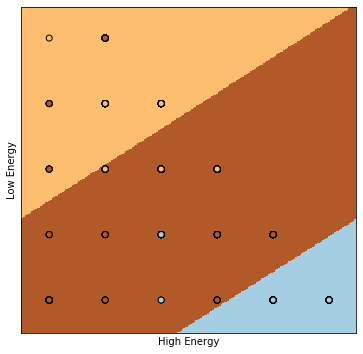

In [18]:
# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6,6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('High Energy')
plt.ylabel('Low Energy')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()